In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

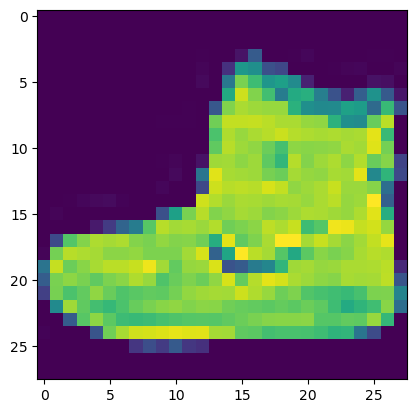

In [3]:
plt.imshow(X_train[0])

In [4]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels[y_train[0]]    

'Ankle boot'

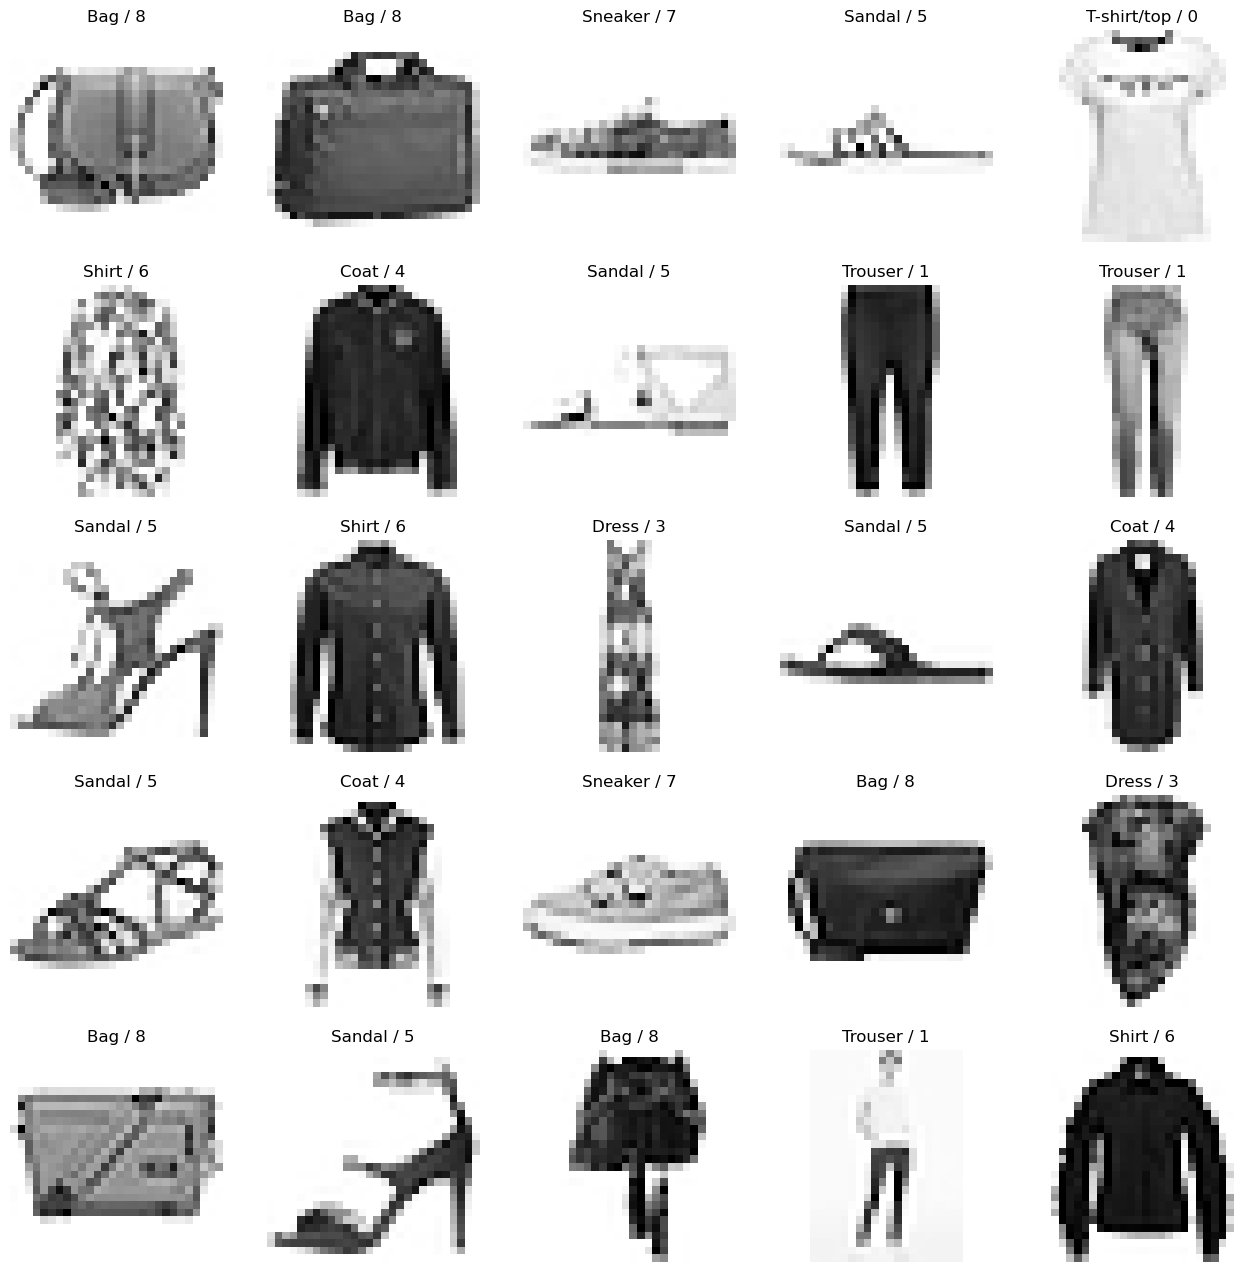

In [5]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [6]:
# number of dimensions is alwas 4 so
X_train.ndim

3

In [7]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [8]:
X_train.ndim
# CNN has 4 dimensions they are (batch_size,height,width,channels)

4

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)


In [12]:
#CNN model
CNN_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

c:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# add optimizer
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
CNN_model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7021 - loss: 0.9522 - val_accuracy: 0.8564 - val_loss: 0.4090
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8608 - loss: 0.3923 - val_accuracy: 0.8774 - val_loss: 0.3502
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8846 - loss: 0.3347 - val_accuracy: 0.8892 - val_loss: 0.3172
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8943 - loss: 0.2982 - val_accuracy: 0.8882 - val_loss: 0.3085
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9019 - loss: 0.2786 - val_accuracy: 0.8935 - val_loss: 0.2933
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9087 - loss: 0.2570 - val_accuracy: 0.9000 - val_loss: 0.2772
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9134 - loss: 0.2425 - val_accuracy: 0.9001 - val_loss: 0.2751
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9167 - loss: 0.2342 - val_accuracy: 0.9046 - v

In [16]:
CNN_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2837


[0.2854383885860443, 0.8977000117301941]

In [17]:
CNN_model.predict(np.expand_dims(X_test[0],axis=0)).round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [18]:
np.argmax(CNN_model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


9

In [21]:
CNN_model.save("CNN_model.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


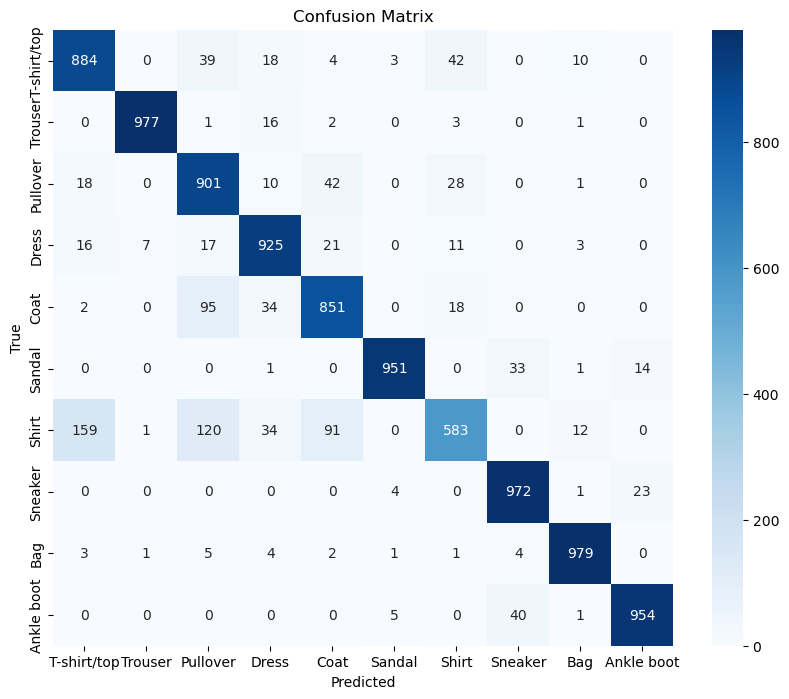

In [19]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = np.argmax(CNN_model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()